In [1]:
%pylab inline
import getdata as gd

Populating the interactive namespace from numpy and matplotlib


In [2]:
d = gd.data_dict('data.csv')

In [3]:
x = d.get('data')[0]
y = d.get('data')[1]
z = d.get('data')[2]

In [4]:
xi = linspace(min(x), max(x), 100)
yi = linspace(min(y), max(y), 100)
zi = griddata(x, y, z, xi, yi, interp='linear')

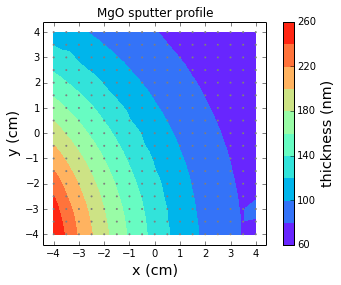

In [6]:
fig = figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
CS = ax.contourf(xi, yi, zi, 10, cmap='rainbow')
CB = colorbar(CS)
GD = ax.scatter(x, y, c=z, s=1, color = 'gray')
ax.set_title('MgO sputter profile')

if d.get('headers'):
    ax.set_xlabel(d.get('headers')[0])
    ax.set_ylabel(d.get('headers')[1])
    CB.set_label(d.get('headers')[2])
